In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Electric_Production.csv', parse_dates=['DATE'], dayfirst=True)

# Make sure the 'DATE' column is in datetime format and set it as the index
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%m-%Y')
df.set_index('DATE', inplace=True)

# Display the first few rows to verify
print(df.head())


              Value
DATE               
1985-01-01  72.5052
1985-01-02  70.6720
1985-01-03  62.4502
1985-01-04  57.4714
1985-01-05  55.3151


<Figure size 1000x800 with 0 Axes>

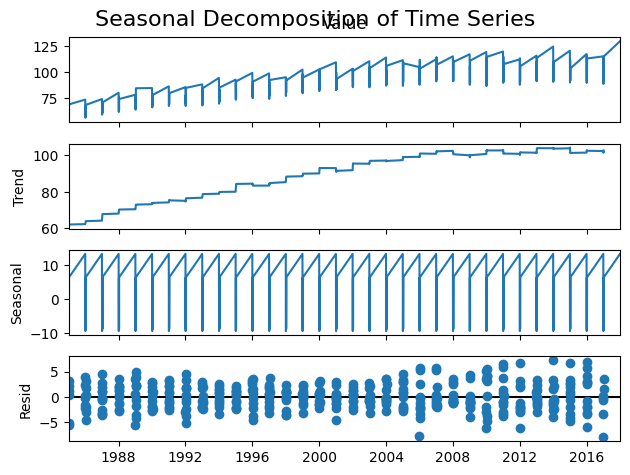

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Calculate the frequency of the data (e.g., monthly, quarterly)
# Adjust the period accordingly based on the frequency

# Assuming your data is monthly, adjust the period to 12
period = 12  # Or appropriate period based on data frequency

# Perform decomposition with adjusted period
result = seasonal_decompose(df['Value'], model='additive', period=period)

# Plot the decomposition
plt.figure(figsize=(10, 8))
result.plot()
plt.suptitle('Seasonal Decomposition of Time Series', fontsize=16)
plt.show()

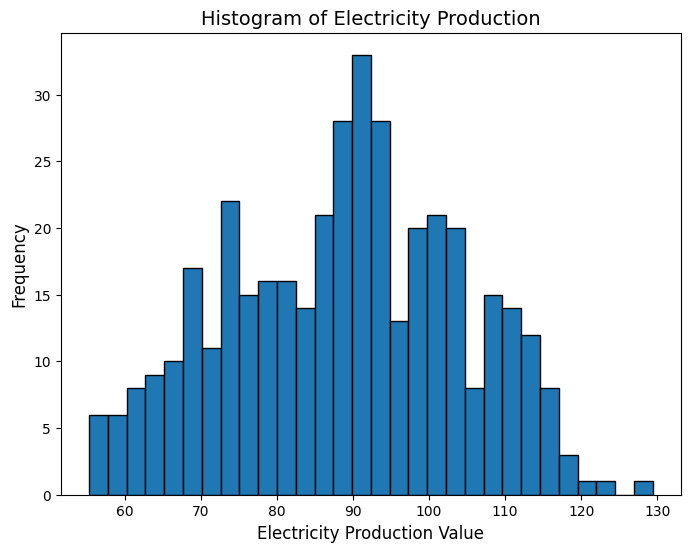

In [12]:
# Plot histogram of the 'Value' column
plt.figure(figsize=(8, 6))
plt.hist(df['Value'], bins=30, edgecolor='black')
plt.title('Histogram of Electricity Production', fontsize=14)
plt.xlabel('Electricity Production Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


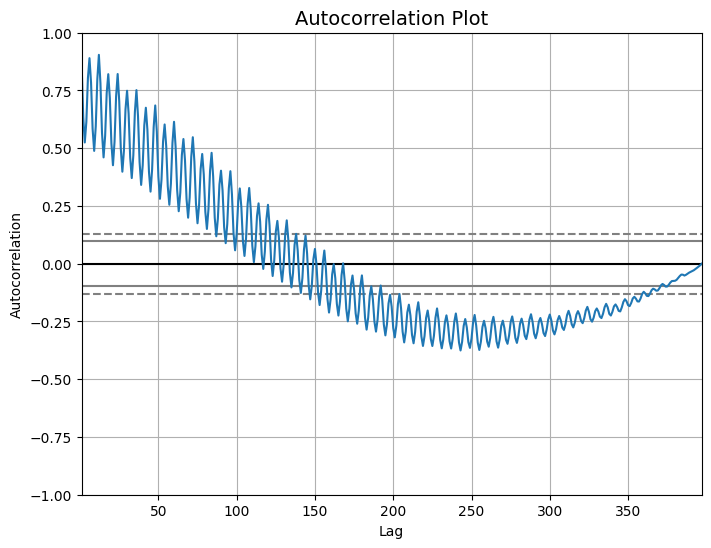

In [13]:
from pandas.plotting import autocorrelation_plot

# Plot autocorrelation
plt.figure(figsize=(8, 6))
autocorrelation_plot(df['Value'])
plt.title('Autocorrelation Plot', fontsize=14)
plt.show()


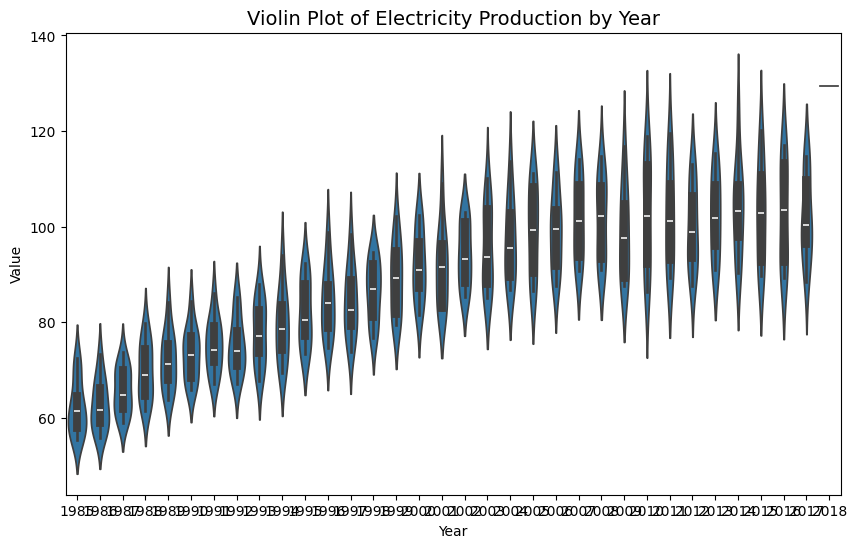

In [14]:
# Extract the year from the date index
df['Year'] = df.index.year

# Create a violin plot to compare electricity production by year
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.violinplot(x='Year', y='Value', data=df)
plt.title('Violin Plot of Electricity Production by Year', fontsize=14)
plt.show()


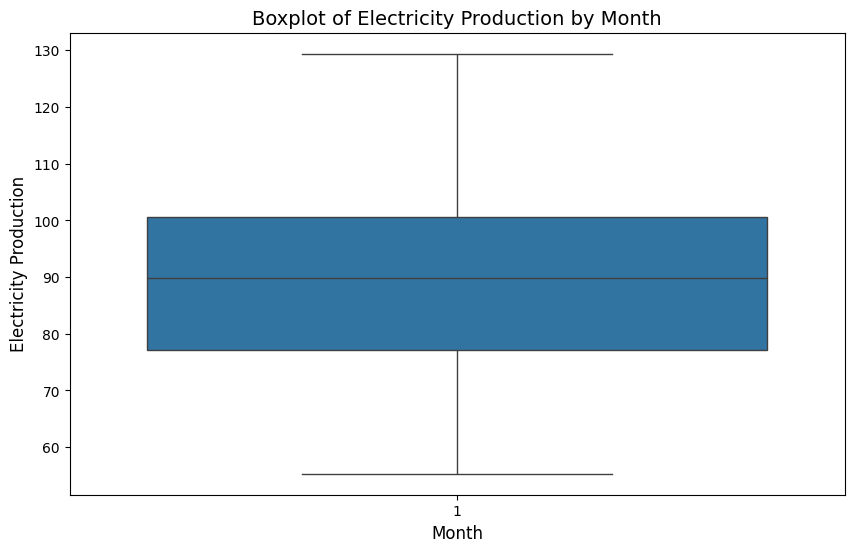

In [15]:
# Add Month to the dataframe for grouping
df['Month'] = df.index.month

# Create boxplot for each month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Value', data=df)
plt.title('Boxplot of Electricity Production by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Electricity Production', fontsize=12)
plt.show()


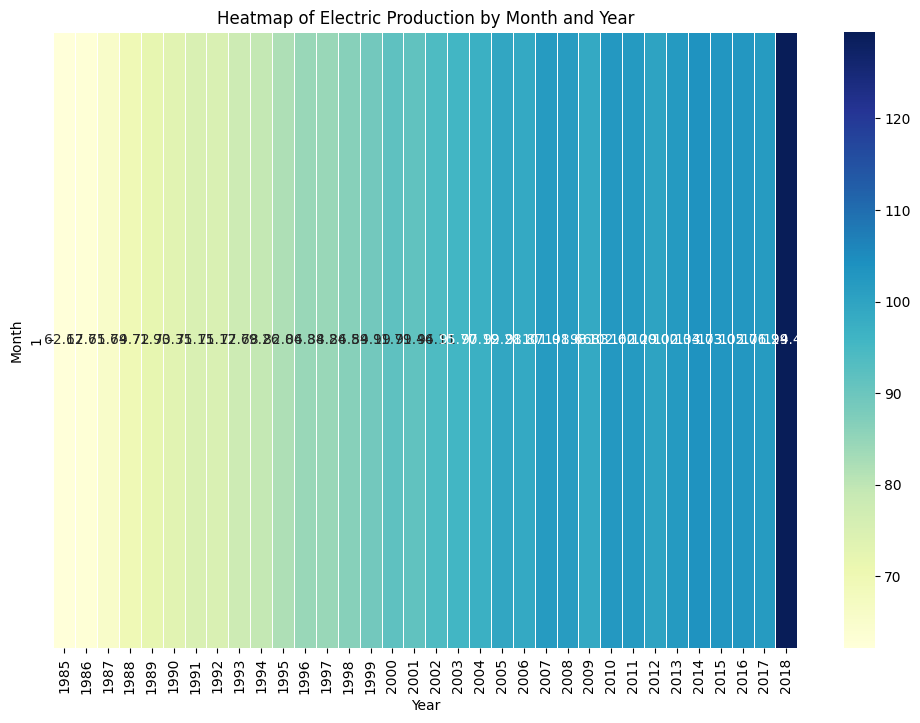

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data to get a matrix of 'Month-Year' vs 'Value'
df['Month'] = df.index.month
df['Year'] = df.index.year

heatmap_data = df.pivot_table(index='Month', columns='Year', values='Value', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Electric Production by Month and Year')
plt.ylabel('Month')
plt.xlabel('Year')
plt.show()


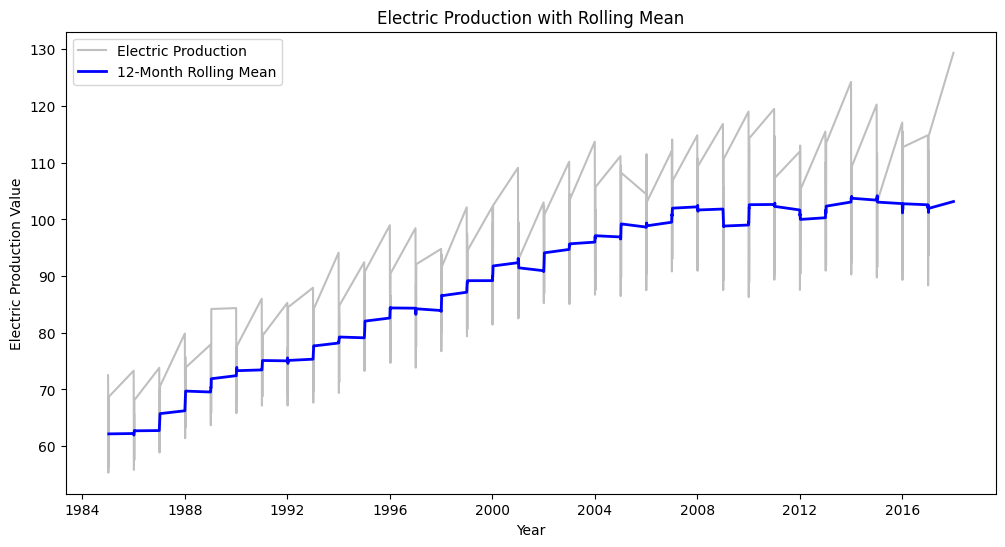

In [17]:
df['Rolling_Mean'] = df['Value'].rolling(window=12).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Value'], label='Electric Production', color='gray', alpha=0.5)
plt.plot(df.index, df['Rolling_Mean'], label='12-Month Rolling Mean', color='blue', linewidth=2)
plt.title('Electric Production with Rolling Mean')
plt.xlabel('Year')
plt.ylabel('Electric Production Value')
plt.legend()
plt.show()


In [18]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Assuming the DataFrame df with 'Value' as the main column is already loaded
# We'll generate mock open, high, low, close values from the 'Value' column
df['Open'] = df['Value'] * np.random.uniform(0.95, 1.05, size=len(df))
df['Close'] = df['Value'] * np.random.uniform(0.95, 1.05, size=len(df))
df['High'] = df[['Open', 'Close']].max(axis=1) * np.random.uniform(1.01, 1.05, size=len(df))
df['Low'] = df[['Open', 'Close']].min(axis=1) * np.random.uniform(0.95, 0.99, size=len(df))

# Create the Candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    increasing_line_color='green', decreasing_line_color='red'
)])

fig.update_layout(
    title='Candlestick Chart of Electric Production',
    xaxis_title='Date',
    yaxis_title='Electric Production Value',
    xaxis_rangeslider_visible=False
)

fig.show()
